In [122]:
import librosa
import numpy as np
from typing import Tuple

In [123]:
def combine_tracks(path_1:str, path_2:str, mult_1=1, mult_2=1, sr=22050) -> Tuple[np.array, int]:
    y_1, sr_1 = librosa.load(path_1, sr=sr)
    y_2, sr_2 = librosa.load(path_2, sr=sr)
    if(y_1.size > y_2.size):
        y_1 = np.pad(y_1, (0,sr_1 - (y_1.size%sr_1)), 'constant', constant_values= (0))
        y_2 = np.pad(y_2, (0,y_1.size-y_2.size), 'constant', constant_values= (0))
    else:
        y_2 = np.pad(y_2, (0,sr_2 - (y_2.size%sr_2)), 'constant', constant_values= (0))
        y_1 = np.pad(y_1, (0,y_2.size-y_1.size), 'constant', constant_values= (0))
    y = np.add(y_1 * mult_1, y_2 * mult_2)
    
    return (y, sr)

def split_snippets(y:np.array, sr:int) -> np.array:
    return y.reshape((int) (y.size/sr), sr)
    

In [124]:
y, sr = combine_tracks("sample_audio_training/trumpet/0005.wav", "sample_audio_training/violin/0010.wav")
split_snippets(y, sr)[0].shape


(22050,)

In [125]:
out  = librosa.feature.melspectrogram(y = y, hop_length= 256, n_mels = 96)

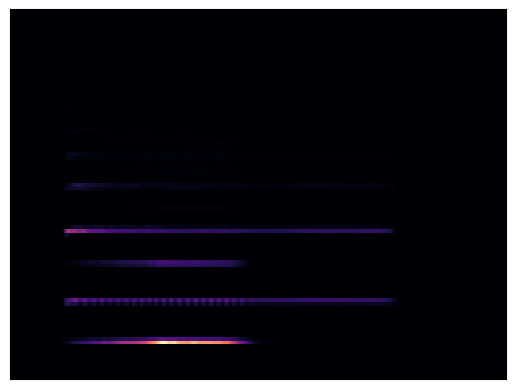

In [126]:
librosa.display.specshow(out)